In [138]:
import pandas as pd
import seaborn as sns
import wordcloud
import matplotlib.pyplot as plt
sns.set_context("notebook")

In [139]:
data = pd.read_csv("clean_data.csv").drop(columns=["Unnamed: 0"])
df = data.copy()

In [140]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,new_title,loc_city,hq_city,min_salary,max_salary
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),Analyst Remote,New York,New York,37.0,66.0
1,Quality Data Analyst,$37K-$66K,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),Data Analyst,New York,New York,37.0,66.0
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,Analytics Solutions,New York,New York,37.0,66.0
3,Data Analyst,$37K-$66K,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),Data Analyst,New York,McLean,37.0,66.0
4,Reporting Data Analyst,$37K-$66K,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),Reporting Analyst,New York,New York,37.0,66.0


## Sectors

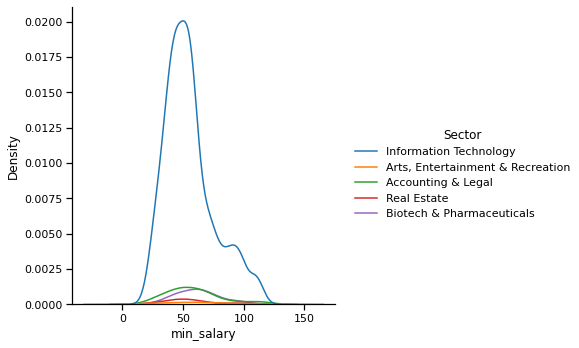

In [141]:
top_sectors = df.groupby("Sector")[['max_salary','min_salary']].mean().sort_values(['max_salary','min_salary'],ascending=False).head(5)
top_industry = df.groupby("Industry")[['max_salary','min_salary']].mean().sort_values(['max_salary','min_salary'],ascending=False).head(5)

sns.displot(df[df["Sector"].isin(top_sectors.index)],x="min_salary",kind="kde",hue="Sector")

## We can see that the IT sector has a much higher presence in the data. We also see that IT sector tends to have a slightly higher minimum salary for a small percentage of jobs.
## Most minimum salaries are close to $40K-$50k.

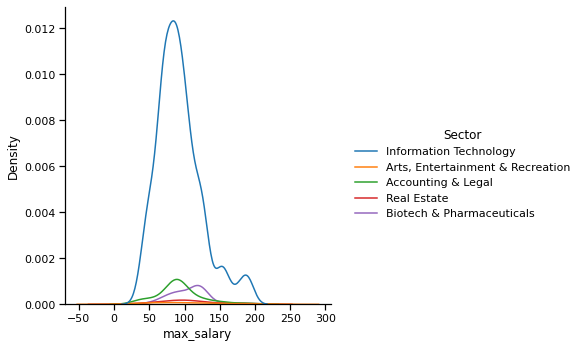

In [142]:
sns.displot(df[df["Sector"].isin(top_sectors.index)],x="max_salary",kind="kde",hue="Sector")

## Slightly more variation in the maximum salary. Especially Biotech companies have a bit higher salaries than the other. It sector though again has the highest possible salaries.

## Industries

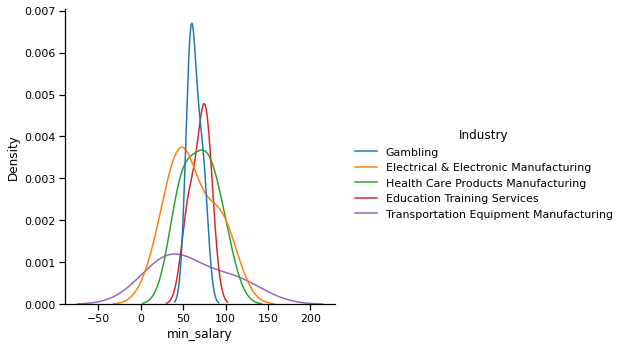

In [143]:
sns.displot(df[df["Industry"].isin(top_industry.index)],x="min_salary",kind="kde",hue="Industry")

## The gambling industry has oddly enough quite a high precense in the top minimum salaries. Transportation Equipment Manufacutring has the lowest minimum salaries which is not a surprise.

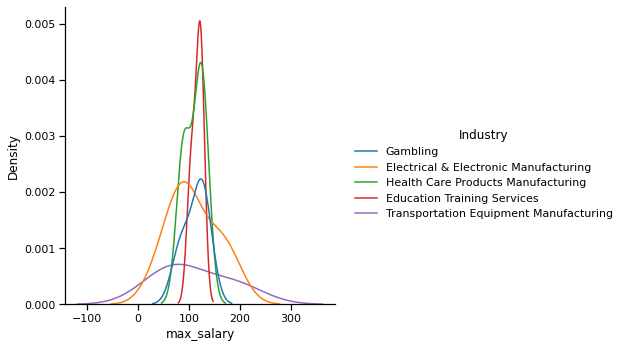

In [144]:
sns.displot(df[df["Industry"].isin(top_industry.index)],x="max_salary",kind="kde",hue="Industry")

## The maximum salaries are quite comparable between sectors and industries.

## Salary distributions over all features

Mean Minimum Salary:  54.26743669480231
Mean Maximum Salary:  89.93561278863233


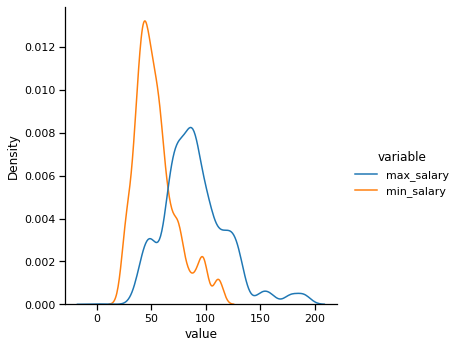

In [145]:
sns.displot(pd.melt(df[['max_salary','min_salary']]),x='value',hue='variable',kind="kde")
print("Mean Minimum Salary: ",df["min_salary"].mean())
print("Mean Maximum Salary: ",df["max_salary"].mean())


## The salaries seem to be quite nicely distributed, which can help if we try to use them as explainable variables later.

## Let us now see how the location and the size of the company affect the salary

In [146]:
def plot_salary_dist(df,dim,min_or_max):
    curr = df.groupby(dim)[['max_salary','min_salary']].mean().sort_values(['max_salary','min_salary'],ascending=False)
    top_curr = curr.head(5)
    tail_curr = curr.tail(5)
    curr_list = top_curr.append(tail_curr).index.tolist()
    sns.displot(df[df[dim].isin(curr_list)],x=min_or_max,kind="kde",hue=dim)
    return 0

C:\Users\johma\miniconda3\envs\gen_ml_env\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


0

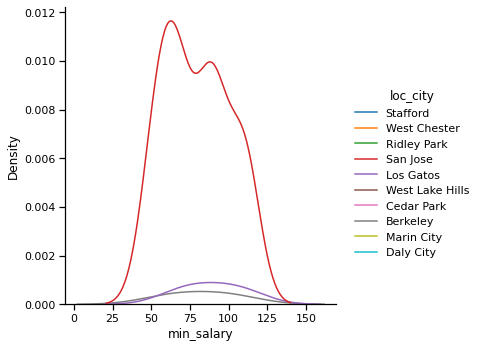

In [147]:
plot_salary_dist(df,dim="loc_city",min_or_max="min_salary")

## The lowest paying cities have so few data points that they cannot be plotted. We can still see that San Jose is presented in the data quite often. The maximum salary plot looks similar but with a slight shift towards higher values.

0

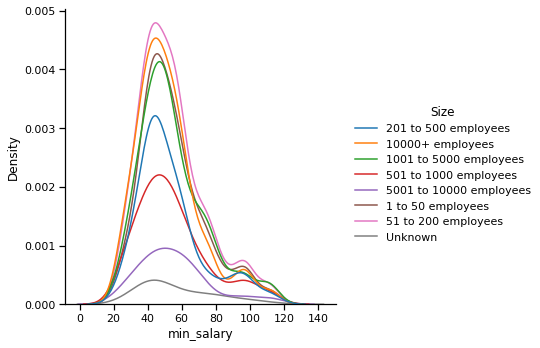

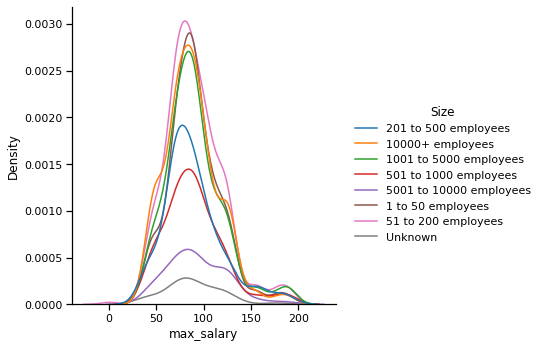

In [148]:
plot_salary_dist(df,dim="Size",min_or_max="min_salary")
plot_salary_dist(df,dim="Size",min_or_max="max_salary")

## The minimum and maximum salaries do seem to follow the same distribution. What is interesting is that companies with 5-10k employees do not compensate their employess the as well as other size companies.

## Finally, we can see what words are used in the job descriptions often using a wordcloud. This is more of an interest of mine, as we are probably not going to use that feature in future analyses and predictions.

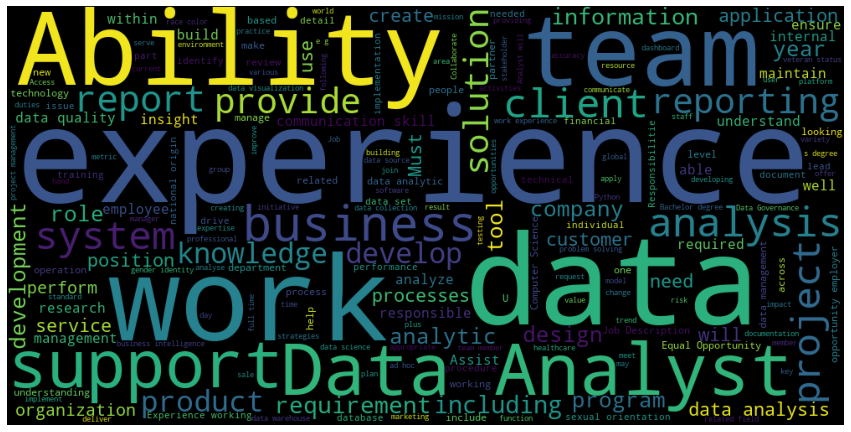

In [149]:
import wordcloud
import matplotlib.pyplot as plt

unique_string=(" ").join(df["Job Description"])
wordcloud = wordcloud.WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## As we can see, the technical jargon is quite prevalent. This is not a bad thing, as we are looking at data-related jobs and these keyword do give more context on the job opportunity